# Analyse Pandas - Séries temporelles

## Dates et données

In [1]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2018, 4, 22, 14, 1, 13, 180630)

In [2]:
now.year,now.month,now.day

(2018, 4, 22)

In [3]:
delta = datetime(2011,1,7)-datetime(2008,6,24,15)
delta

datetime.timedelta(926, 32400)

In [6]:
delta.seconds

32400

In [7]:
str(now)

'2018-04-22 14:01:13.180630'

In [9]:
stamp=datetime(2011,1,7)
stamp.strftime('%Y-%m-%d')

'2011-01-07'

In [15]:
dateStr = ['7/6/2011','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in dateStr]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [16]:
from dateutil.parser import parse

parse('2011-03-01')

datetime.datetime(2011, 3, 1, 0, 0)

In [17]:
parse('2011-03-01',dayfirst=True)

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
import pandas as pd
pd.to_datetime(dateStr)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [21]:
sr = pd.to_datetime(dateStr)

In [22]:
from pandas import Series

srT = Series([1,2],index=sr)

In [24]:
srT

2011-07-06    1
2011-08-06    2
dtype: int64

In [25]:
srT + srT[::1]

2011-07-06    2
2011-08-06    4
dtype: int64

In [26]:
srT.index[1]

Timestamp('2011-08-06 00:00:00')

In [29]:
import numpy as np

longer_ts = Series(np.random.randn(1000),
                  index=pd.date_range('1/1/2000',periods=1000))
longer_ts.head(5)

2000-01-01   -0.313095
2000-01-02   -1.120080
2000-01-03    0.186513
2000-01-04   -0.846343
2000-01-05   -1.570387
Freq: D, dtype: float64

In [31]:
longer_ts['2001-5'].head(5)

2001-05-01    1.841890
2001-05-02    1.532028
2001-05-03    0.090551
2001-05-04   -0.192868
2001-05-05    0.152132
Freq: D, dtype: float64

In [33]:
longer_ts['2001-5':'2001-7'].tail(5)

2001-07-27   -0.869876
2001-07-28   -0.382972
2001-07-29    0.454983
2001-07-30   -1.384290
2001-07-31    0.497067
Freq: D, dtype: float64

In [35]:
ws_ts = Series(np.random.randn(100),
                  index=pd.date_range('1/1/2000',periods=100,freq='W-WED'))
ws_ts.head(5)

2000-01-05    0.464432
2000-01-12   -0.982788
2000-01-19    0.047098
2000-01-26   -0.420571
2000-02-02    0.883214
Freq: W-WED, dtype: float64

In [38]:
ajout=datetime(2000,1,5)
ajout

datetime.datetime(2000, 1, 5, 0, 0)

In [43]:
doubleChunk = Series({ajout:0.1234589})
newTab = ws_ts.append(doubleChunk)
newTab.tail(5)

2001-11-07   -1.035579
2001-11-14    0.785745
2001-11-21    0.044412
2001-11-28   -0.921375
2000-01-05    0.123459
dtype: float64

In [44]:
grouped = newTab.groupby(level=0)
grouped.count().head(5)

2000-01-05    2
2000-01-12    1
2000-01-19    1
2000-01-26    1
2000-02-02    1
dtype: int64

## Générer des plages de date

In [48]:
completTab = newTab.resample('D')
completTab.head(10)

C:\Users\monne\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  


2000-01-05    0.293945
2000-01-06         NaN
2000-01-07         NaN
2000-01-08         NaN
2000-01-09         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12   -0.982788
2000-01-13         NaN
2000-01-14         NaN
Freq: D, dtype: float64

In [49]:
index1 = pd.date_range(start='4/1/2012',periods=20)
index1


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [51]:
index2 = pd.date_range('4/1/2012','6/1/2012')
index2

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [52]:
index3 = pd.date_range(end='8/1/2012',periods=10)
index3

DatetimeIndex(['2012-07-23', '2012-07-24', '2012-07-25', '2012-07-26',
               '2012-07-27', '2012-07-28', '2012-07-29', '2012-07-30',
               '2012-07-31', '2012-08-01'],
              dtype='datetime64[ns]', freq='D')

In [54]:
# Toutes les fins de mois ouvrables
index4 = pd.date_range('4/1/2012','4/1/2013',freq='BM')
index4

DatetimeIndex(['2012-04-30', '2012-05-31', '2012-06-29', '2012-07-31',
               '2012-08-31', '2012-09-28', '2012-10-31', '2012-11-30',
               '2012-12-31', '2013-01-31', '2013-02-28', '2013-03-29'],
              dtype='datetime64[ns]', freq='BM')

In [55]:
# Toutes les fins de mois calendaires
index5 = pd.date_range('4/1/2012','4/1/2013',freq='M')
index5

DatetimeIndex(['2012-04-30', '2012-05-31', '2012-06-30', '2012-07-31',
               '2012-08-31', '2012-09-30', '2012-10-31', '2012-11-30',
               '2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31'],
              dtype='datetime64[ns]', freq='M')

In [57]:
# 3ième vendredi de chaque mois
index6 = pd.date_range('4/1/2017','4/1/2018',freq='WOM-3FRI')
index6

DatetimeIndex(['2017-04-21', '2017-05-19', '2017-06-16', '2017-07-21',
               '2017-08-18', '2017-09-15', '2017-10-20', '2017-11-17',
               '2017-12-15', '2018-01-19', '2018-02-16', '2018-03-16'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## Décalage de dates

In [58]:
now

datetime.datetime(2018, 4, 22, 14, 1, 13, 180630)

In [62]:
from pandas.tseries.offsets import Day,MonthEnd
from pandas.tseries import offsets 

d1 = now + MonthEnd()
d1

Timestamp('2018-04-30 14:01:13.180630')

In [66]:
d2 = now + MonthEnd(2)
d2

Timestamp('2018-05-31 14:01:13.180630')

In [68]:
d3 = now + 3 * Day()
d3

Timestamp('2018-04-25 14:01:13.180630')

In [69]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2018-04-30 14:01:13.180630')

In [72]:
offset = MonthEnd()
offset.rollback(now)

Timestamp('2018-03-31 14:01:13.180630')

## Périodes

In [73]:
p = pd.Period(2007,freq='A-DEC')
p

Period('2007', 'A-DEC')

In [74]:
p + 5

Period('2012', 'A-DEC')

In [75]:
p-3

Period('2004', 'A-DEC')

In [77]:
rng = pd.period_range('1/1/2000','6/30/2000',freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [80]:
Series(np.random.randn(6),index=rng)

2000-01   -0.374513
2000-02    0.603397
2000-03    1.748946
2000-04    1.202379
2000-05   -0.436123
2000-06    3.560774
Freq: M, dtype: float64

In [81]:
rngm = p.asfreq('M',how='start')

In [82]:
rngm

Period('2007-01', 'M')

In [83]:
rngm = p.asfreq('M',how='end')
rngm

Period('2007-12', 'M')

In [85]:
# Année fiscale sur juin
pj = pd.Period('2010',freq='A-JUN')

In [87]:
rngm = pj.asfreq('M',how='end')
rngm

Period('2010-06', 'M')

In [88]:
rngn = pj.asfreq('M',how='start')
rngn

Period('2009-07', 'M')

In [98]:
# Fréquences trimestrielles
pj = pd.Period('2010',freq='Q-DEC')
rngm = pj.asfreq('M',how='start')
rngm

Period('2010-01', 'M')

In [99]:
rngm = pj.asfreq('M',how='end')
rngm

Period('2010-03', 'M')

In [100]:
rngm = pj.asfreq('D',how='end')
rngm

Period('2010-03-31', 'D')

In [101]:
# Fréquences trimestrielles
pj = pd.Period('2010Q2',freq='Q-DEC')
rngm = pj.asfreq('M',how='start')
rngm


Period('2010-04', 'M')

In [102]:
rngm = pj.asfreq('M',how='end')
rngm

Period('2010-06', 'M')

In [107]:
rng = pd.period_range('2007Q3','2008Q4',freq='Q-JAN')
ts = Series(np.arange(len(rng)),index=rng)
ts

2007Q3    0
2007Q4    1
2008Q1    2
2008Q2    3
2008Q3    4
2008Q4    5
Freq: Q-JAN, dtype: int32

In [109]:
rng = pd.period_range('2007Q3','2008Q4',freq='M')
ts = Series(np.arange(len(rng)),index=rng)
ts

2007-07     0
2007-08     1
2007-09     2
2007-10     3
2007-11     4
2007-12     5
2008-01     6
2008-02     7
2008-03     8
2008-04     9
2008-05    10
2008-06    11
2008-07    12
2008-08    13
2008-09    14
2008-10    15
Freq: M, dtype: int32

In [110]:
ts.index

PeriodIndex(['2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12',
             '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
             '2008-07', '2008-08', '2008-09', '2008-10'],
            dtype='period[M]', freq='M')

In [112]:
ts.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [114]:
ts.resample('Y').sum()

2007     15
2008    105
Freq: A-DEC, dtype: int32

In [120]:
ts.resample('D').mean().head(5)

2007-07-01    0.0
2007-07-02    NaN
2007-07-03    NaN
2007-07-04    NaN
2007-07-05    NaN
Freq: D, dtype: float64

In [126]:
ts.resample('D').ffill()

2007-07-01     0
2007-07-02     0
2007-07-03     0
2007-07-04     0
2007-07-05     0
2007-07-06     0
2007-07-07     0
2007-07-08     0
2007-07-09     0
2007-07-10     0
2007-07-11     0
2007-07-12     0
2007-07-13     0
2007-07-14     0
2007-07-15     0
2007-07-16     0
2007-07-17     0
2007-07-18     0
2007-07-19     0
2007-07-20     0
2007-07-21     0
2007-07-22     0
2007-07-23     0
2007-07-24     0
2007-07-25     0
2007-07-26     0
2007-07-27     0
2007-07-28     0
2007-07-29     0
2007-07-30     0
              ..
2008-10-02    15
2008-10-03    15
2008-10-04    15
2008-10-05    15
2008-10-06    15
2008-10-07    15
2008-10-08    15
2008-10-09    15
2008-10-10    15
2008-10-11    15
2008-10-12    15
2008-10-13    15
2008-10-14    15
2008-10-15    15
2008-10-16    15
2008-10-17    15
2008-10-18    15
2008-10-19    15
2008-10-20    15
2008-10-21    15
2008-10-22    15
2008-10-23    15
2008-10-24    15
2008-10-25    15
2008-10-26    15
2008-10-27    15
2008-10-28    15
2008-10-29    

## Graphiques

In [131]:
ws_ts = Series(np.random.randn(120),
                  index=pd.date_range('1/1/2016',periods=120,freq='W-WED'))

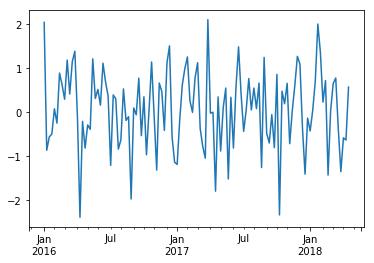

In [132]:
from matplotlib import pylab as plt
ws_ts.plot()

C:\Users\monne\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """Entry point for launching an IPython kernel.


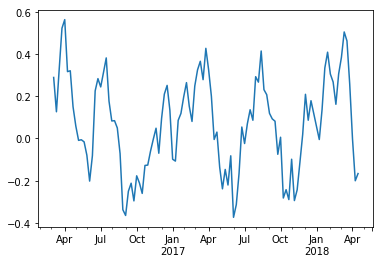

In [133]:
pd.rolling_mean(ws_ts,10).plot()

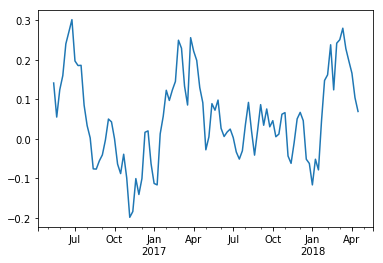

In [134]:
ws_ts.rolling(window=20,center=False).mean().plot()

In [135]:
%timeit ts.resample('D').ffill()

1.77 ms ± 436 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
